# **Task 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

%cd drive/MyDrive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/'
/content/drive/MyDrive


## Question 1

In [ ]:
Keyword = pd.read_csv('Keyword_data.csv')

## Question 2.keyword data convert into a weighted adjacency matrix.


In [ ]:
Keyword.dropna(axis=0, how = 'all', inplace = True, thresh =2)
Keyword

,Title,Keyword 1,Keyword 2,Keyword 3,Keyword 4,Keyword 5,Keyword 6,Keyword 7,Keyword 8,Keyword 9,Keyword 10,Keyword 11,Keyword 12
2,Meta-Analyses of Financial Performance and Equ...,EQUITY,ORGANIZATIONAL sociology,PERFORMANCE,META-analysis,PSYCHOMETRICS,ORGANIZATIONAL research,FINANCIAL performance,AGENCY theory,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,CORPORATE governance,NaN
3,"Home Country Environments, Corporate Diversifi...",DIVERSIFICATION in industry,BUSINESS planning,PERFORMANCE standards,EMPLOYEES -- Rating of,CORPORATE culture,STRATEGIC planning,ORGANIZATIONAL effectiveness,MANAGEMENT science,MANAGEMENT research,PRODUCT management,NaN,NaN
4,Safeguarding Investments in Asymmetric Interor...,INTERORGANIZATIONAL relations,INTERGROUP relations,BUSINESS communication,INVESTMENTS,SUPPLY chains,KNOWLEDGE management,INTERORGANIZATIONAL networks,CORPORATE governance,GROUP decision making,INTELLECTUAL capital,NaN,NaN
5,Managerialist and Human Capital Explanations f...,EXECUTIVE compensation,WAGES,HUMAN capital,LABOR economics,PERSONNEL management,MANAGEMENT science,CONTINGENCY theory (Management),COMPENSATION management,EXECUTIVE ability (Management),CORPORATE governance,NaN,NaN
6,Bidding Wars Over R&D-Intensive Firms: Knowled...,KNOWLEDGE management,INFORMATION resources management,MANAGEMENT information systems,BREAK-even analysis,DATA mining,MANAGEMENT science,RESEARCH & development,RESEARCH & development contracts,CORPORATE governance,DECISION making,ORGANIZATIONAL behavior,TRANSACTION costs
7,When “The Show Must Go On”: Surface Acting and...,EMOTIONS (Psychology),INTERPERSONAL relations,STRESS (Psychology),SOCIAL interaction,SOCIAL psychology,EMPLOYEES -- Attitudes,CUSTOMER services,CUSTOMER satisfaction,JOB stress,PEER review (Professional performance),NaN,NaN
8,Relationships among Supervisors' and Subordina...,SUPERVISORS,JUSTICE,CONFLICT management,MEDIATION,EMPLOYEES,INDUSTRIAL relations,ORGANIZATIONAL behavior,UNITED States -- National Guard,ORGANIZATIONAL effectiveness,DECISION making,RESOURCE allocation,NaN
9,Punctuated Equilibrium and Linear Progression:...,INDUSTRIAL relations,MANAGEMENT science,DECISION theory,ORGANIZATIONAL sociology,PUNCTUATED equilibrium (Evolution),ORGANIZATIONAL change,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,BUSINESS models,ORGANIZATIONAL research,NaN,NaN
13,The Relationship between Overconfidence and th...,DECISION making,EXECUTIVES,INDUSTRIAL management,NEW products,HIGH technology industries,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Governance Through Ownership: Centuries of Pra...,CORPORATE governance,INDUSTRIAL management,STOCKHOLDERS wealth,INSTITUTIONAL investors,WAGES,NEW products,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,DECENTRALIZATION in management,ORGANIZATIONAL effectiveness,NaN,NaN


#### Lookup dictionary for assigning weights in metrics

In [ ]:
Titledict = Keyword.set_index('Title').T.to_dict('list')
Titledict

{'A Behavioral Theory of R&D Expenditures and Innovations: Evidence from Shipbuilding': ['ORGANIZATIONAL behavior',
  'CORPORATIONS -- Finance',
  'RESEARCH & development',
  'INDUSTRIAL management',
  'INNOVATIONS in business',
  'INNOVATION management',
  'BUSINESS planning',
  'SHIPBUILDING industry',
  'TECHNOLOGICAL innovations -- Economic aspects',
  'SUCCESS in business',
  'COMPETITIVE advantage',
  'ORGANIZATIONAL change'],
 'A Customer Interaction Approach to Strategy and Production Complexity Alignment in Service Firms': ['SERVICE industries -- Management',
  'CUSTOMER relations',
  'INDUSTRIAL management',
  'PRODUCTION management',
  'STRATEGIC planning',
  'CUSTOMER services',
  'LABOR process',
  'ORGANIZATIONAL behavior',
  'DECISION making',
  'CUSTOMER satisfaction',
  'CUSTOMER orientation',
  'MARKETING strategy'],
 'A Social Capital Model of High-Growth Ventures': ['SOCIAL capital (Sociology)',
  'INFRASTRUCTURE (Economics)',
  'VENTURE capital',
  'INVESTMENTS',
 

In [ ]:
for title in Titledict.keys():
  if "EQUITY" in (Titledict[title]):
    print("yes")

yes


Create a Keyword Dataframe without the Title column

In [ ]:
Keywords = Keyword.iloc[:,1:]

In [ ]:
Keywords.iloc[0,:]

Keyword 1                           EQUITY
Keyword 2         ORGANIZATIONAL sociology
Keyword 3                      PERFORMANCE
Keyword 4                    META-analysis
Keyword 5                    PSYCHOMETRICS
Keyword 6          ORGANIZATIONAL research
Keyword 7            FINANCIAL performance
Keyword 8                    AGENCY theory
Keyword 9     ORGANIZATIONAL effectiveness
Keyword 10         ORGANIZATIONAL behavior
Keyword 11            CORPORATE governance
Keyword 12                             NaN
Name: 2, dtype: object

Extract Unique keywords to create 248 * 248 base metrics

In [ ]:
unique_keyword_list = []
for col in Keywords:
  for kw in Keywords[col].dropna():
    if kw not in unique_keyword_list: 
      unique_keyword_list.append(kw)


In [ ]:
lengthoflist = len(unique_keyword_list)
lengthoflist

248

In [ ]:
## zeros metrics of size of keywords dataframe 248 * 248
Adj = np.zeros((lengthoflist, lengthoflist), dtype = int)

In [ ]:
for i in range(0, 248):
  for j in range(0, 248):
    if i != j :
      if (Adj[i][j] == 0) and (Adj[j][i] == 0) :
        for title in Titledict.keys():
          if (unique_keyword_list[i] in (Titledict[title])) and (unique_keyword_list[j] in (Titledict[title])):
            Adj[i][j] = Adj[i][j] + 1
            Adj[j][i] = Adj[j][i] + 1 

In [ ]:
column_names = unique_keyword_list
row_names    = unique_keyword_list
#df = pd.DataFrame(A, columns=column_names, index=row_names)

## Question 3 Read adjacency matrix and convert into a weighted network


In [ ]:
net = nx.from_numpy_matrix(Adj, parallel_edges=False)

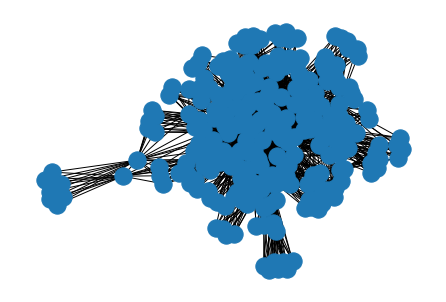

In [ ]:
nx.draw(net)

In [ ]:
net.number_of_nodes()

248

In [ ]:
net.number_of_edges()

2141

## Question 4. Compute node degree and strength


In [ ]:
degreeDict = net.degree()

#strength (weighted degree)
strengthDict = net.degree (weight = 'weight')
strengthDict

DegreeView({0: 10, 1: 20, 2: 27, 3: 36, 4: 20, 5: 9, 6: 10, 7: 59, 8: 112, 9: 85, 10: 14, 11: 19, 12: 20, 13: 47, 14: 15, 15: 18, 16: 136, 17: 20, 18: 37, 19: 11, 20: 126, 21: 28, 22: 9, 23: 265, 24: 32, 25: 37, 26: 78, 27: 9, 28: 38, 29: 9, 30: 18, 31: 9, 32: 44, 33: 60, 34: 16, 35: 27, 36: 11, 37: 20, 38: 11, 39: 11, 40: 96, 41: 31, 42: 17, 43: 18, 44: 11, 45: 36, 46: 10, 47: 84, 48: 19, 49: 10, 50: 25, 51: 29, 52: 9, 53: 19, 54: 11, 55: 20, 56: 20, 57: 9, 58: 9, 59: 9, 60: 9, 61: 9, 62: 57, 63: 9, 64: 9, 65: 7, 66: 9, 67: 30, 68: 11, 69: 42, 70: 11, 71: 9, 72: 9, 73: 11, 74: 9, 75: 10, 76: 9, 77: 10, 78: 10, 79: 17, 80: 9, 81: 31, 82: 10, 83: 49, 84: 10, 85: 9, 86: 18, 87: 9, 88: 80, 89: 10, 90: 9, 91: 9, 92: 9, 93: 9, 94: 17, 95: 9, 96: 35, 97: 26, 98: 11, 99: 29, 100: 11, 101: 10, 102: 9, 103: 18, 104: 11, 105: 9, 106: 10, 107: 48, 108: 11, 109: 9, 110: 8, 111: 9, 112: 144, 113: 11, 114: 19, 115: 11, 116: 19, 117: 19, 118: 9, 119: 10, 120: 9, 121: 9, 122: 9, 123: 20, 124: 18, 125:

## Question 5. Show the top 10 nodes by degree and top 10 nodes by strength

In [ ]:
## result table format Nodes, Strength(w), Degree(k)

col = ['Nodes', 'Degree']
df_degree = pd.DataFrame(degreeDict, columns = col)

## dataframe of keywords
df_words = pd.DataFrame(unique_keyword_list, columns = ['Keywords'])
df_words_degree = pd.merge(df_words, df_degree, left_index=True, right_index=True)
df_words_degree[['Keywords','Degree']].sort_values(by =['Degree'], ascending=False).head(10)


,Keywords,Degree
23,ORGANIZATIONAL behavior,166
112,ORGANIZATIONAL effectiveness,104
16,MANAGEMENT science,102
20,PERSONNEL management,93
8,DECISION making,90
156,ORGANIZATIONAL structure,74
40,ORGANIZATIONAL sociology,66
88,STRATEGIC planning,66
47,INDUSTRIAL management,64
9,CORPORATE governance,62


In [ ]:
df_strength = pd.DataFrame(strengthDict, columns = ['Nodes', 'Strength'])


result_df = pd.merge( df_words_degree, df_strength, how="inner", on=['Nodes'])

result_df[['Keywords','Strength']].sort_values(by =['Strength'], ascending=False).head(10)

,Keywords,Strength
23,ORGANIZATIONAL behavior,265
112,ORGANIZATIONAL effectiveness,144
16,MANAGEMENT science,136
20,PERSONNEL management,126
8,DECISION making,112
156,ORGANIZATIONAL structure,107
40,ORGANIZATIONAL sociology,96
9,CORPORATE governance,85
47,INDUSTRIAL management,84
88,STRATEGIC planning,80


## Question 6. Show the top 10 node link by weight

In [ ]:
dataf = pd.DataFrame()
for i in range(0, 248):
  for j in range(0, 248):
    if net.get_edge_data(i, j):
      data_row = {
          'Node1': int(i),
          'Node2': int(j),
          'firstKeyword':df_words.iat[int(i),0],
          'secondKeyword':df_words.iat[int(j),0],
          'weight': net.get_edge_data(i,j)['weight']
      }
      dataf=dataf.append(data_row,ignore_index=True)

In [ ]:
dataf[['firstKeyword','secondKeyword','weight']].sort_values(by='weight', ascending=False).head(10)

,firstKeyword,secondKeyword,weight
2492,ORGANIZATIONAL effectiveness,ORGANIZATIONAL behavior,11.0
817,ORGANIZATIONAL behavior,ORGANIZATIONAL effectiveness,11.0
3188,ORGANIZATIONAL structure,ORGANIZATIONAL behavior,9.0
848,ORGANIZATIONAL behavior,ORGANIZATIONAL structure,9.0
749,ORGANIZATIONAL behavior,PERSONNEL management,8.0
614,PERSONNEL management,ORGANIZATIONAL behavior,8.0
457,MANAGEMENT science,ORGANIZATIONAL behavior,7.0
745,ORGANIZATIONAL behavior,MANAGEMENT science,7.0
2554,ORGANIZATIONAL effectiveness,ORGANIZATIONAL structure,6.0
183,DECISION making,ORGANIZATIONAL behavior,6.0


## Question 7. 
Plot average strength on y-axis and degree on x-axis**

In [ ]:
result_dataf = pd.merge( df_degree, df_strength, how="inner", on=['Nodes'])

In [86]:
table_plot = result_dataf[['Degree','Strength']].groupby('Degree').mean().reset_index()

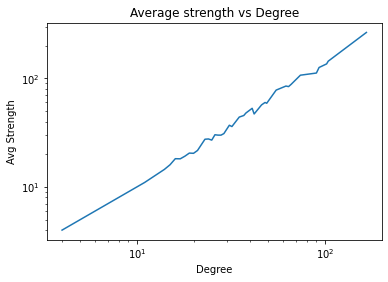

In [87]:
x = table_plot['Degree']
y = table_plot['Strength']

plt.title('Average strength vs Degree')
plt.xlabel('Degree')
plt.ylabel('Avg Strength')
plt.loglog(x, y)
plt.show()